1. Based on the paper:k-means-clustering-Wikipedia.2002271236.pdf to realise the naive-algorithm of kmeans.

In [1]:
import numpy as np
import random
  
def cluster_points(X, mu):# calculate the distance between the points and centroids respectively   
    clusters={}           # and allocate the point to the closest cluster.
    for x in X:
        bestmukey=min([(i[0], np.linalg.norm(x-mu[i[0]])) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey]=[x]
    return clusters
def reevaluate_centers(mu, clusters):# after the allocation, the centroid points need to be recalculated.
    newmu=[]
    keys=sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis=0))
    return newmu

def has_converged(mu, oldmu): # this function to confirm if the training step is being converged.
    return (set([tuple(a) for a in mu])== set([tuple(a) for a in oldmu]))

def find_centers(X,K):# Using this function to initialize the centroids and training data set.
    oldmu=random.sample(list(X), K)
    mu=random.sample(list(X), K)
    while not has_converged(mu, oldmu):
        oldmu=mu
        clusters=cluster_points(X,mu)
        mu=reevaluate_centers(oldmu,clusters)
    return(mu, clusters)




2. Use following the code can generate a 2D data set with 100 points and plot the graph

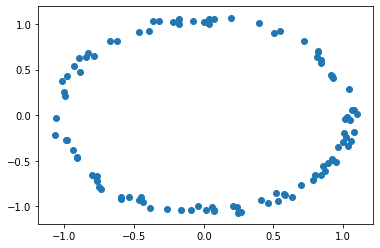

In [88]:
import math
import matplotlib.pyplot as plt
import pandas as pd

thets=np.array([(random.uniform(0,1)) for i in range(100)])*2*math.pi
radis=np.array([(random.uniform(0,1)) for i in range(100)])*0.1+1.0
X=np.array([(np.cos(i),np.sin(i)) for i in (thets) ])# this step can generate a dateset with configuration of [[data1],[data2],...].
M=np.mat(np.diag(radis))*np.mat(X)    # this step can realise a matrix multiply: (100,100)*(100,2).
X=np.array(M)            # this step is to transform 2D matrix to 1D array which is easy to plot.
plt.scatter(X[:,0], X[:,1])
dataframe=pd.DataFrame(X)
dataframe.to_csv("k.X.csv",index=False,sep=',')

3. When k=2, calculate and record the Within-cluster sum of squares (WCSS), then plot the iteration process.

9


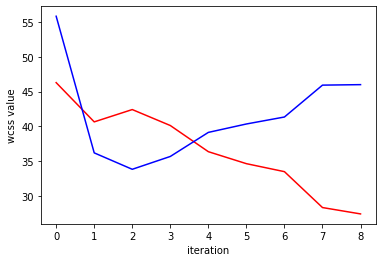

In [96]:
oldmu=random.sample(list(X), 2)
mu=random.sample(list(X), 2)
w_1=[]
w_2=[]
wcss=[w_1, w_2]
while not has_converged(mu, oldmu):# iteration process: when the process is not converged the process will be continued
    oldmu=mu
    clusters=cluster_points(X,mu)
    for i in range(2): # respectively calculate the wcss of each cluster and allocate the value to corresponding list.
        wcss[i].append(np.sum([np.linalg.norm(mu[i]-j) for j in (clusters[i])]))  
    mu=reevaluate_centers(oldmu,clusters)

a=list(range(len(w_1))) # generate a iteration steps list.
#print(w_1)
#print(w_2)
print(len(w_1))
plt.xlabel("iteration") 
plt.ylabel("wcss value")
plt.plot(a, w_1,'r-' )
plt.plot(a, w_2,'b-' )
plt.show()

4. Plot the final clusters graph when k=2,3,4 respectively.

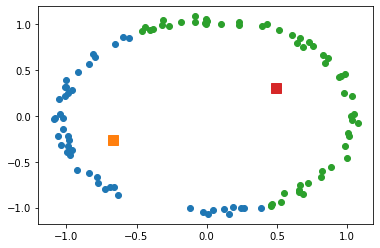

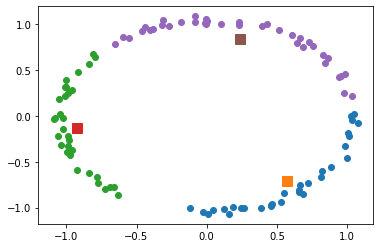

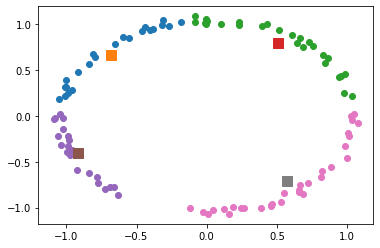

In [81]:
if __name__ =="__main__":
    for k in range(2,5):
        K=k
        mu, clusters = find_centers(X, K)
        x=[]
        y=[]
        for i in range(K):
            lx=[]
            ly=[]
            for l0 in clusters[i]:
                lx.append(l0[0])
                ly.append(l0[1])
            x.append(lx)
            y.append(ly)
        for i in range(K):
            plt.plot(x[i],y[i],'o')
            plt.plot(mu[i][0], mu[i][1],'s', markersize=10)
        plt.show()